In [1]:
import numpy as np
import scipy.stats as sps
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import cor_cluster

In [2]:
dmats = np.load('MC_A20_act4_boot.npz')

In [3]:
alias = {'Venomology':'Alchemize', 'Night Terror':'Nightmare', 'Crippling Poison':'Crippling Cloud',
         'Underhanded Strike':'Sneaky Strike', 'Lockon':'Bullseye', 'Steam':'Steam Barrier', 'Steam Power':'Overclock',
         'Redo':'Recursion', 'Undo':'Equilibrium', 'Gash':'Claw', 'ClearTheMind':'Tranquility', 'Wireheading':'Foresight',
         'Vengeance':'Simmering Fury', 'Adaptation':'Rushdown', 'PathToVictory':'Pressure Points', 'Ghostly':'Apparition',
         'Snake Skull':'Snecko Skull', 'GremlinMask':'Gremlin Visage', 'NlothsMask':"N'loth's Hungry Face",
         'Molten Egg 2':'Molten Egg', 'Toxic Egg 2':'Toxic Egg', 'Wraith Form v2':'Wraith Form',
         'Frozen Egg 2':'Frozen Egg', 'CurseOfTheBell':'Curse of the Bell', 'NeowsBlessing':"Neow's Blessing",
         'Fasting2':'Fasting', 'FlurryOfBlows':'Flurry of Blows', 'WaveOfTheHand':'Wave of the Hand',
         'SandsOfTime':'Sands of Time', 'TalkToTheHand':'Talk to the Hand', 'HandOfGreed':'Hand of Greed',
         'NeowsBlessing':"Neow's Lament", 'All For One':'All for One'}

In [4]:
cmap = cm.get_cmap('cividis')

In [5]:
def camel_to_space(s):
    for i in range(1, len(s)):
        if s[i].isupper() and s[i - 1].isalpha() and not s[i - 1].isupper():
            return s[:i] + ' ' + camel_to_space(s[i:])
    return s

Ironclad items

In [6]:
D = dmats['ironclad_boot']
lbls = dmats['ironclad_labels']

for i, name in enumerate(lbls):
    lbls[i] = camel_to_space(alias.get(name, name))

In [7]:
# delete Necronomicurse and Curse of the Bell columns as they are highly correlated with Necronomicon and Calling Bell, resp.c
k = len(lbls)
flat = cor_cluster.flat(k)
del_inds = np.nonzero((lbls == 'Necronomicurse') | (lbls == 'Curse of the Bell'))[0]
inds_flat = [flat[(i, j)] for i in range(k - 1) for j in range(i + 1, k) if i not in del_inds and j not in del_inds]
inds = [i for i in range(k) if i not in del_inds]

lbls = lbls[inds]
D = D[:, inds_flat]

In [8]:
Z = cor_cluster.consensus_cluster(D, lbls)

In [9]:
Z_cut = cor_cluster.split_linkage(Z[:75], lbls)

In [10]:
Z_large = [t for t in Z_cut if len(t[0]) > 1]
Z_small = [t for t in Z_cut if len(t[0]) == 1]

In [11]:
Z_large = cor_cluster.sort_linkages(Z_large, 'mean')
Z_small = cor_cluster.sort_linkages(Z_small, 'mean', desc = True)

In [12]:
np.quantile(D[1:].std(axis = 0), [0, 0.25, .5, 0.75, 1])

array([0.00052135, 0.00666858, 0.00690064, 0.00713783, 0.01855467])

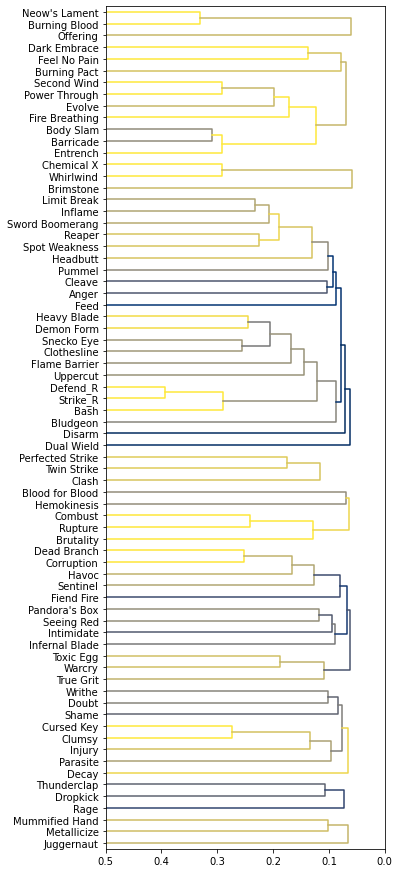

In [13]:
plt.figure(figsize = (5, 15.5))
plt.xlim(0, 0.5)
cor_cluster.dendrogram(Z_large, cmap = cmap, orientation = 'h')

In [14]:
for p, pl in Z_small:
    print('{}---{} ; rho = {} ; p = {}'.format(pl[0], pl[1], p[0, 2], p[0, 4]))

Pain---Warped Tongs ; rho = 0.2813757903674903 ; p = 1.0
Armaments---Searing Blow ; rho = 0.12939366953307374 ; p = 1.0
Panacea---Flex ; rho = 0.09425538785220611 ; p = 0.604
Bag of Marbles---Black Star ; rho = 0.0873317556528993 ; p = 0.386
Wild Strike---Reckless Charge ; rho = 0.0864711502780725 ; p = 0.98
Pommel Strike---Molten Egg ; rho = 0.08568852634502133 ; p = 0.998
Apotheosis---Fusion Hammer ; rho = 0.0831046904817141 ; p = 1.0
Apparition---Strange Spoon ; rho = 0.07684747732317876 ; p = 0.914
Bloodletting---Runic Cube ; rho = 0.07538450524922746 ; p = 0.872
Potion Belt---Sacred Bark ; rho = 0.05976403488287774 ; p = 0.814
Flash of Steel---Finesse ; rho = 0.05911518734542476 ; p = 0.442
Deep Breath---Madness ; rho = 0.059054465843449644 ; p = 0.594
Bottled Lightning---Shovel ; rho = 0.05904670019587488 ; p = 0.326


Silent items

In [46]:
D = dmats['silent_boot']
lbls = dmats['silent_labels']
for i, name in enumerate(lbls):
    lbls[i] = camel_to_space(alias.get(name, name))

In [47]:
# delete Necronomicurse and Curse of the Bell columns as they are highly correlated with Necronomicon and Calling Bell, resp.c
k = len(lbls)
flat = cor_cluster.flat(k)
del_inds = np.nonzero((lbls == 'Necronomicurse') | (lbls == 'Curse of the Bell'))[0]
inds_flat = [flat[(i, j)] for i in range(k - 1) for j in range(i + 1, k) if i not in del_inds and j not in del_inds]
inds = [i for i in range(k) if i not in del_inds]

lbls = lbls[inds]
D = D[:, inds_flat]

In [48]:
Z = cor_cluster.consensus_cluster(D, lbls)

In [49]:
Z_cut = cor_cluster.split_linkage(Z[:75], lbls)

In [50]:
Z_large = [t for t in Z_cut if len(t[0]) > 1]
Z_small = [t for t in Z_cut if len(t[0]) == 1]

In [51]:
Z_large = cor_cluster.sort_linkages(Z_large, 'mean')
Z_small = cor_cluster.sort_linkages(Z_small, 'mean', desc = True)

In [52]:
np.quantile(D[1:].std(axis = 0), [0, 0.25, .5, 0.75, 1])

array([0.00067529, 0.00830136, 0.00861899, 0.00895201, 0.02218836])

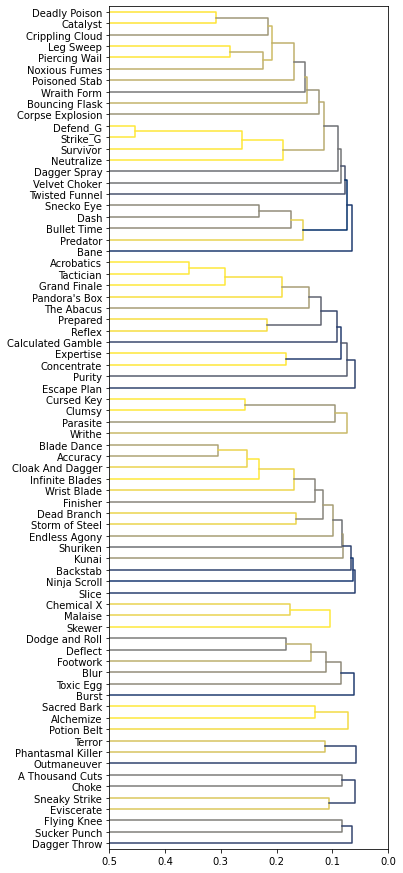

In [53]:
plt.figure(figsize = (5, 15.5))
plt.xlim(0, 0.5)
cor_cluster.dendrogram(Z_large, cmap = cmap, orientation = 'h')

In [54]:
for p, pl in Z_small:
    print('{}---{} ; rho = {} ; p = {}'.format(pl[0], pl[1], p[0, 2], p[0, 4]))

Ring of the Snake---Neow's Lament ; rho = 0.34917416531070755 ; p = 1.0
Apotheosis---Fusion Hammer ; rho = 0.12605587205483448 ; p = 0.998
Envenom---Riddle With Holes ; rho = 0.11834048517921392 ; p = 0.95
Apparition---Strange Spoon ; rho = 0.11053591921002126 ; p = 0.93
Whetstone---Black Star ; rho = 0.09291111022213483 ; p = 0.304
Tools of the Trade---Hovering Kite ; rho = 0.09204702827284017 ; p = 0.88
Caltrops---Frozen Egg ; rho = 0.0894571009929015 ; p = 0.826
Flechettes---Runic Pyramid ; rho = 0.08450160226572512 ; p = 0.718
Calling Bell---Omamori ; rho = 0.0683211196473632 ; p = 0.596
Backflip---Well Laid Plans ; rho = 0.06797710945100033 ; p = 0.796
RitualDagger---Quick Slash ; rho = 0.05736805724156502 ; p = 0.326


Defect items

In [55]:
D = dmats['defect_boot']
lbls = dmats['defect_labels']
for i, name in enumerate(lbls):
    lbls[i] = camel_to_space(alias.get(name, name))

In [56]:
# delete Necronomicurse and Curse of the Bell columns as they are highly correlated with Necronomicon and Calling Bell, resp.c
k = len(lbls)
flat = cor_cluster.flat(k)
del_inds = np.nonzero((lbls == 'Necronomicurse') | (lbls == 'Curse of the Bell'))[0]
inds_flat = [flat[(i, j)] for i in range(k - 1) for j in range(i + 1, k) if i not in del_inds and j not in del_inds]
inds = [i for i in range(k) if i not in del_inds]

lbls = lbls[inds]
D = D[:, inds_flat]

In [57]:
Z = cor_cluster.consensus_cluster(D, lbls)

In [58]:
Z_cut = cor_cluster.split_linkage(Z[:75], lbls)

In [59]:
Z_large = [t for t in Z_cut if len(t[0]) > 1]
Z_small = [t for t in Z_cut if len(t[0]) == 1]

In [60]:
Z_large = cor_cluster.sort_linkages(Z_large, 'mean')
Z_small = cor_cluster.sort_linkages(Z_small, 'mean', desc = True)

In [61]:
np.quantile(D[1:].std(axis = 0), [0, 0.25, .5, 0.75, 1])

array([0.00081779, 0.01021992, 0.01058959, 0.01096079, 0.02112165])

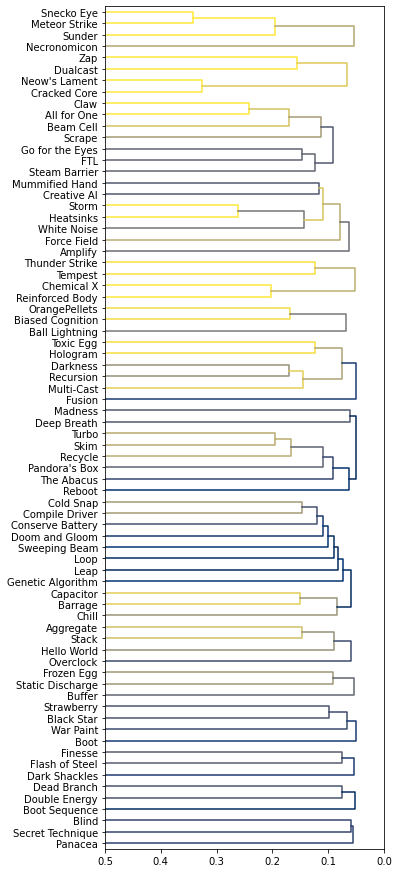

In [62]:
plt.figure(figsize = (5, 15.5))
plt.xlim(0, 0.5)
cor_cluster.dendrogram(Z_large, cmap = cmap, orientation = 'h')

In [63]:
for p, pl in Z_small:
    print('{}---{} ; rho = {} ; p = {}'.format(pl[0], pl[1], p[0, 2], p[0, 4]))

Consume---Inserter ; rho = 0.1945805677546536 ; p = 0.944
Glacier---Blizzard ; rho = 0.12428980228220454 ; p = 0.884
Parasite---Cursed Key ; rho = 0.1232670907747252 ; p = 0.864
Apparition---Strange Spoon ; rho = 0.11900168706235237 ; p = 0.864
Apotheosis---Fusion Hammer ; rho = 0.09405172076151325 ; p = 0.976
Calling Bell---Omamori ; rho = 0.08988708002019596 ; p = 0.912
Purity---Runic Pyramid ; rho = 0.07190025423517021 ; p = 0.252
Writhe---Blue Candle ; rho = 0.06970082018629387 ; p = 0.46
Sacred Bark---White Beast Statue ; rho = 0.06562972921892674 ; p = 0.474
Echo Form---Self Repair ; rho = 0.06323678153535617 ; p = 0.426
Coolheaded---Fission ; rho = 0.0599438637865185 ; p = 0.338
Bullseye---Chaos ; rho = 0.05686540403024587 ; p = 0.324
Melter---Rebound ; rho = 0.056334981326582434 ; p = 0.156
Shuriken---Shovel ; rho = 0.05619995396133881 ; p = 0.288
Seek---Astrolabe ; rho = 0.053553616503448254 ; p = 0.546
Membership Card---Anchor ; rho = 0.05000124709103804 ; p = 0.15


Watcher items

In [65]:
D = dmats['watcher_boot']
lbls = dmats['watcher_labels']
for i, name in enumerate(lbls):
    lbls[i] = camel_to_space(alias.get(name, name))

In [66]:
# delete Necronomicurse and Curse of the Bell columns as they are highly correlated with Necronomicon and Calling Bell, resp.c
k = len(lbls)
flat = cor_cluster.flat(k)
del_inds = np.nonzero((lbls == 'Necronomicurse') | (lbls == 'Curse of the Bell'))[0]
inds_flat = [flat[(i, j)] for i in range(k - 1) for j in range(i + 1, k) if i not in del_inds and j not in del_inds]
inds = [i for i in range(k) if i not in del_inds]

lbls = lbls[inds]
D = D[:, inds_flat]

In [67]:
Z = cor_cluster.consensus_cluster(D, lbls)

In [68]:
Z_cut = cor_cluster.split_linkage(Z[:75], lbls)

In [69]:
Z_large = [t for t in Z_cut if len(t[0]) > 1]
Z_small = [t for t in Z_cut if len(t[0]) == 1]

In [70]:
Z_large = cor_cluster.sort_linkages(Z_large, 'mean')
Z_small = cor_cluster.sort_linkages(Z_small, 'mean', desc = True)

In [71]:
np.quantile(D[1:].std(axis = 0), [0, 0.25, .5, 0.75, 1])

array([0.00063555, 0.00831268, 0.00860079, 0.00890333, 0.02110946])

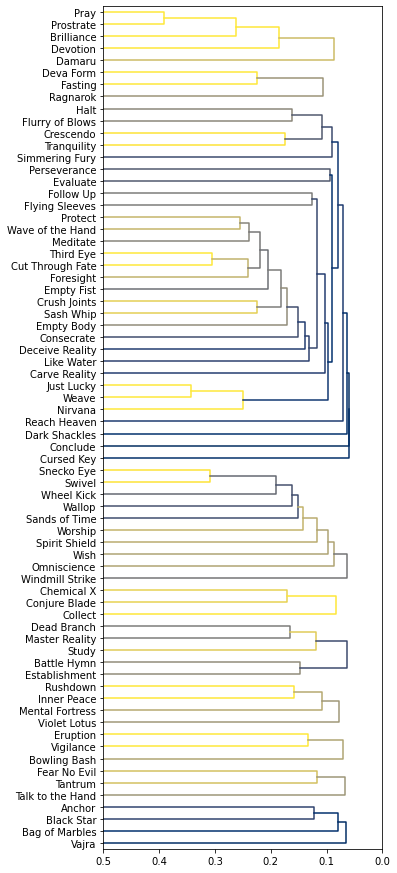

In [73]:
plt.figure(figsize = (5, 15.5))
plt.xlim(0, 0.5)
cor_cluster.dendrogram(Z_large, cmap = cmap, orientation = 'h')

In [74]:
for p, pl in Z_small:
    print('{}---{} ; rho = {} ; p = {}'.format(pl[0], pl[1], p[0, 2], p[0, 4]))

Pure Water---Neow's Lament ; rho = 0.46650114862992287 ; p = 1.0
Lesson Learned---Fusion Hammer ; rho = 0.18328229584747435 ; p = 1.0
Flash of Steel---Finesse ; rho = 0.09469877412701544 ; p = 0.912
Deus Ex Machina---Pandora's Box ; rho = 0.09262184021613828 ; p = 0.902
Apparition---Strange Spoon ; rho = 0.07966657345741956 ; p = 0.994
Purity---The Abacus ; rho = 0.07842985772448008 ; p = 0.678
Empty Mind---Indignation ; rho = 0.07260791643388953 ; p = 0.33
Impatience---Deep Breath ; rho = 0.07102923518973614 ; p = 0.554
Foreign Influence---Toxic Egg ; rho = 0.06474137722342288 ; p = 0.414
Ectoplasm---Red Mask ; rho = 0.06217648360222927 ; p = 0.704
Calling Bell---Du-Vu Doll ; rho = 0.05987433858164337 ; p = 0.34
Apotheosis---Hand of Greed ; rho = 0.05846045354093399 ; p = 0.742
Sacred Bark---White Beast Statue ; rho = 0.058422457357930946 ; p = 0.522
Scrawl---Astrolabe ; rho = 0.05779788754829529 ; p = 0.572
Shuriken---Shovel ; rho = 0.05763769913891592 ; p = 0.242


Render reference color bar.

(0.0, 1.0, 0.0, 1.0)

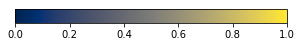

In [75]:
plt.figure(figsize = (5, 0.25))
plt.colorbar(cm.ScalarMappable(cmap = cmap), orientation = 'horizontal', fraction = 1)
plt.axis('off')